# Rainfall Weather Forecasting

Project Description:
    
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given
location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at 
a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather
observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
    
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b) Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:
    
Number of columns: 23

Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
    
RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [5]:
df.shape

(8425, 23)

Rows - 8425 & columns - 23 in the datasets

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [7]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [8]:
numerical_features = [features for features in df.columns if df[features].dtypes !='O']
discrete_features = [features for features in numerical_features if len(df[features].unique())<25]
continous_features = [features for features in numerical_features if features not in discrete_features]
categorical_features = [features for features in df.columns if features not in numerical_features]
print("Numerical Features Count {}".format(len(numerical_features)))
print("Discrete_features Count {}".format(len(discrete_features)))
print("Continous_features Count {}".format(len(continous_features)))
print("Categorical_features Count {}".format(len(categorical_features)))

Numerical Features Count 16
Discrete_features Count 2
Continous_features Count 14
Categorical_features Count 7


We observe, Numerical features is 16 in dataset,
            Discrete features(Random features) is 2 in dataset,
            Continous features (float type) is 14 in dataset,
            Categorical features (Object type) is 7 in dataset

In [9]:
 df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [10]:
df['Date'].dtypes

dtype('O')

In [11]:
# check the numerical features in dataset ...

[features for features in df.columns if df[features].dtypes !='O']

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [12]:
# Discrete features ...

[features for features in numerical_features if len(df[features].unique())<25]

['Cloud9am', 'Cloud3pm']

In [13]:
# continous features ...

[features for features in numerical_features if features not in discrete_features]

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [14]:
# categorical features ...

[features for features in df.columns if features not in numerical_features]

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [15]:
# check the null value ...

df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [16]:
# check the percentage of missing value...

df.isnull().sum()*100/(len(df))

Date              0.000000
Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
Evaporation      41.685460
Sunshine         47.406528
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am         28.735905
Cloud3pm         29.139466
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

In [17]:
numerical_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [18]:
categorical_features

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [19]:
# using fillna method for replace null values with mean for continous columns...

df.fillna(df.mean(), inplace = True)

In [20]:
# using fillna method for replace null values with mode for Object type columns :

mode_values = {'WindGustDir' : df['WindGustDir'].mode()[0], 'WindDir9am' : df['WindDir9am'].mode()[0],
               'RainToday' : df['RainToday'].mode()[0], 'RainTomorrow' : df['RainTomorrow'].mode()[0],
               'WindDir3pm' : df['WindDir3pm'].mode()[0]}

In [21]:
df.fillna(value = mode_values, inplace = True)

In [22]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

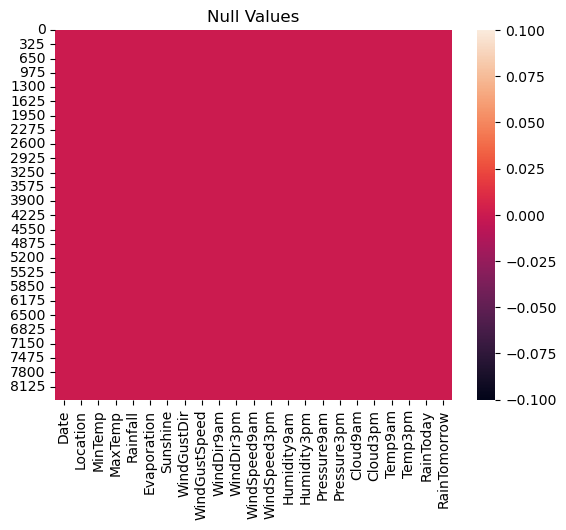

In [23]:
# checking heatmap :
    
sns.heatmap(df.isnull())  
plt.title('Null Values')
plt.show()

EDA - Expolatory Data Analysis and Data Visualization :

In [24]:
# Data Visualization:

df['Location'].value_counts()

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Albury'),
  Text(1, 0, 'CoffsHarbour'),
  Text(2, 0, 'Newcastle'),
  Text(3, 0, 'Penrith'),
  Text(4, 0, 'Williamtown'),
  Text(5, 0, 'Wollongong'),
  Text(6, 0, 'Melbourne'),
  Text(7, 0, 'Brisbane'),
  Text(8, 0, 'Adelaide'),
  Text(9, 0, 'PerthAirport'),
  Text(10, 0, 'Darwin'),
  Text(11, 0, 'Uluru')])

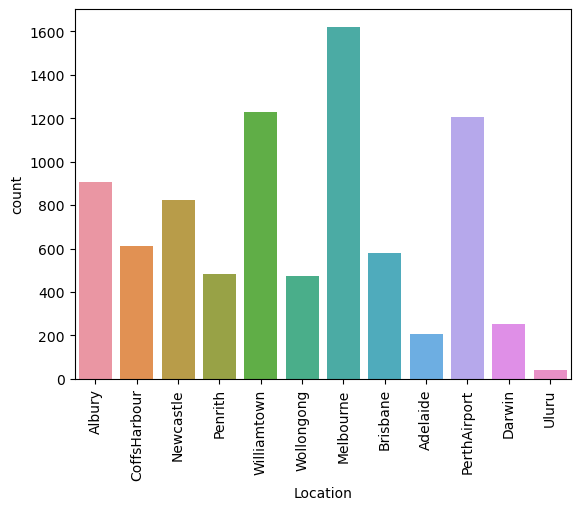

In [25]:
sns.countplot(df['Location'])
plt.xticks(rotation = 90)

In [26]:
df['WindGustDir'].value_counts()

N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: WindGustDir, dtype: int64

<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

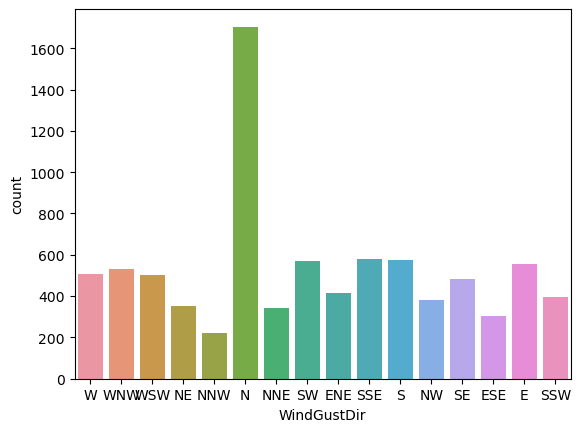

In [27]:
sns.countplot(df['WindGustDir'])

In [28]:
df['WindDir9am'].value_counts()

N      1735
SW      704
NW      625
WSW     543
SE      505
WNW     480
SSW     467
ENE     433
NNE     430
W       414
NE      409
S       402
E       380
SSE     365
NNW     280
ESE     253
Name: WindDir9am, dtype: int64

<AxesSubplot:xlabel='WindDir9am', ylabel='count'>

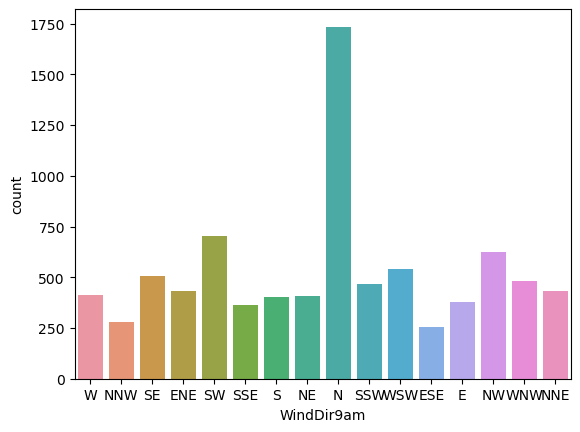

In [29]:
sns.countplot(df['WindDir9am'])

In [30]:
df['WindDir3pm'].value_counts()

SE     1121
S       742
SSE     623
WSW     580
NE      544
N       524
SW      494
WNW     487
NW      468
W       462
ESE     462
E       460
ENE     417
SSW     370
NNE     365
NNW     306
Name: WindDir3pm, dtype: int64

<AxesSubplot:xlabel='WindDir3pm', ylabel='count'>

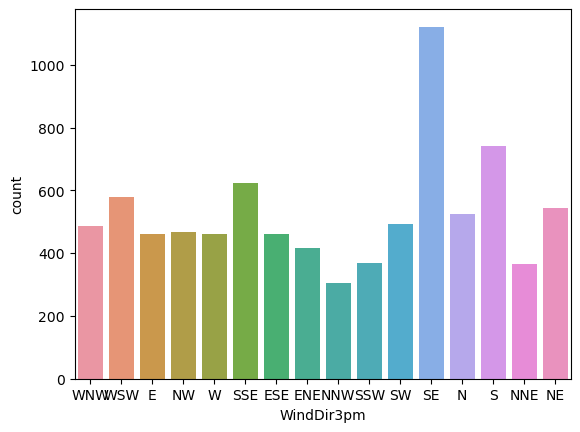

In [31]:
sns.countplot(df['WindDir3pm'])

In [32]:
df['RainToday'].value_counts()

No     6435
Yes    1990
Name: RainToday, dtype: int64

<AxesSubplot:xlabel='RainToday', ylabel='count'>

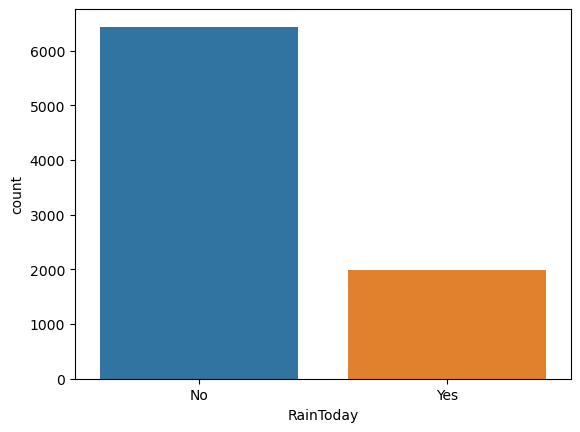

In [33]:
sns.countplot(df['RainToday'])

In [34]:
df['RainTomorrow'].value_counts()

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

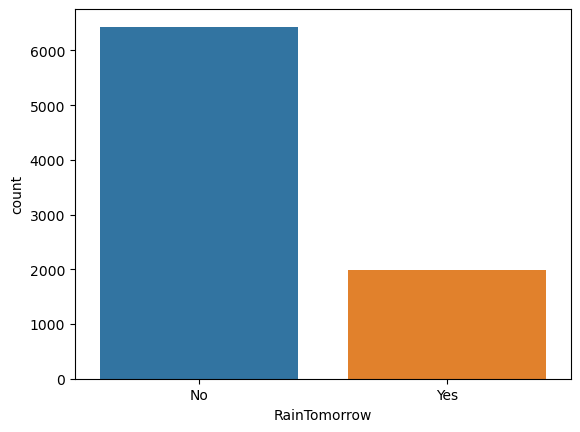

In [35]:
sns.countplot(df['RainTomorrow'])

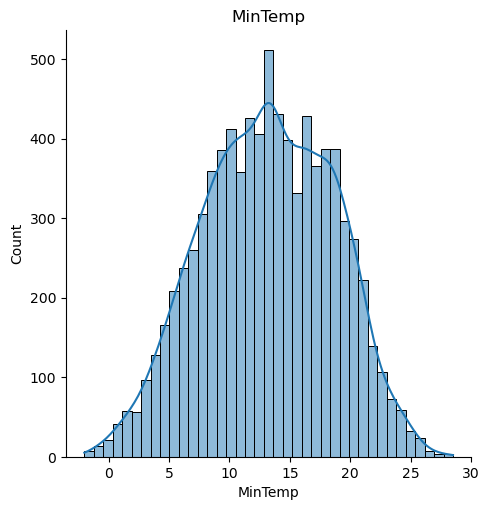

<Figure size 1000x700 with 0 Axes>

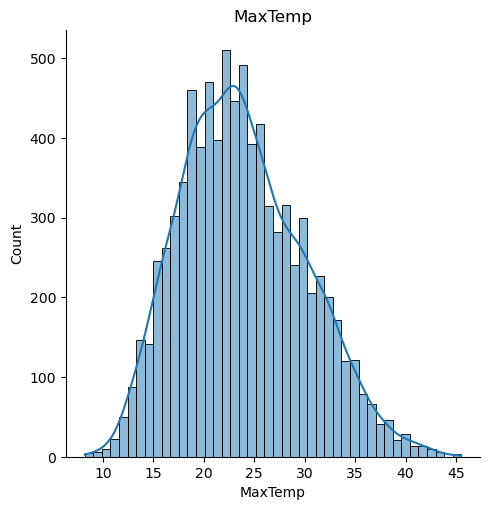

<Figure size 1000x700 with 0 Axes>

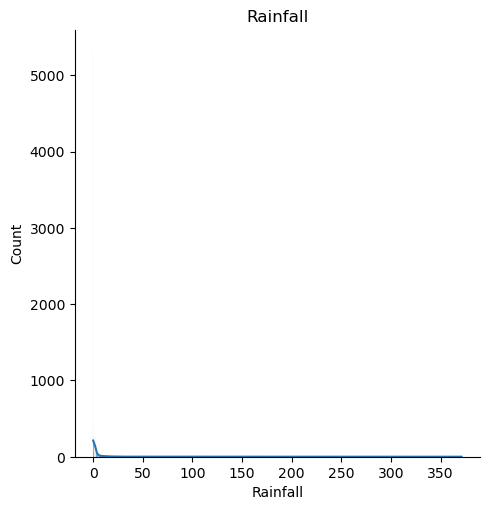

<Figure size 1000x700 with 0 Axes>

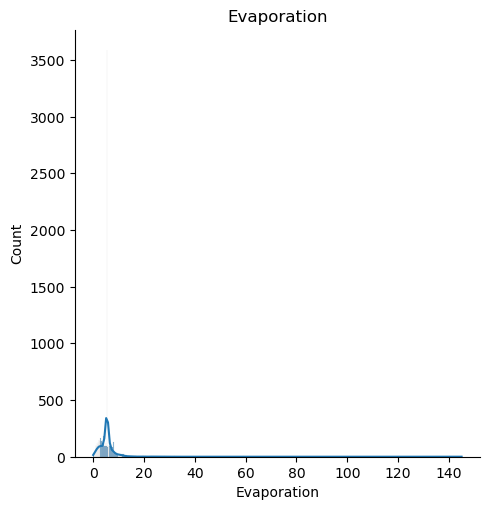

<Figure size 1000x700 with 0 Axes>

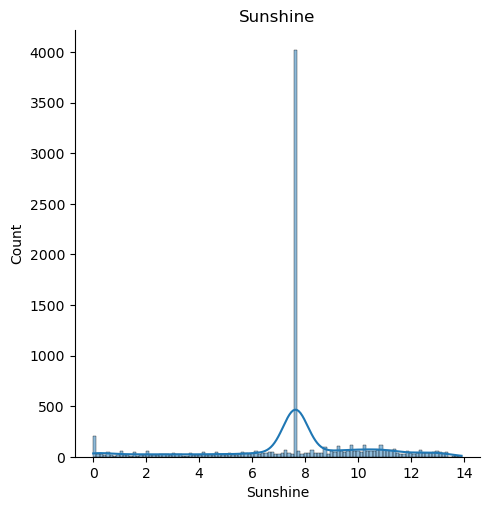

<Figure size 1000x700 with 0 Axes>

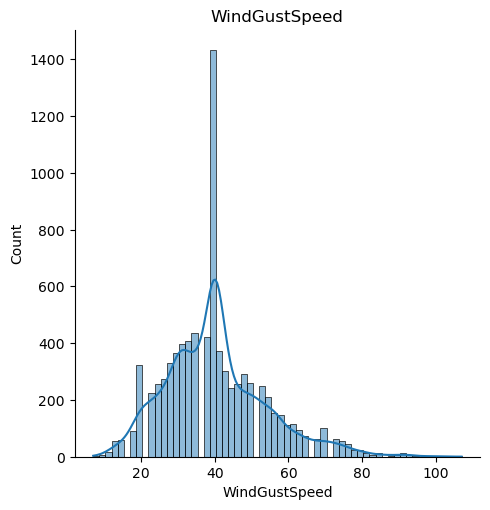

<Figure size 1000x700 with 0 Axes>

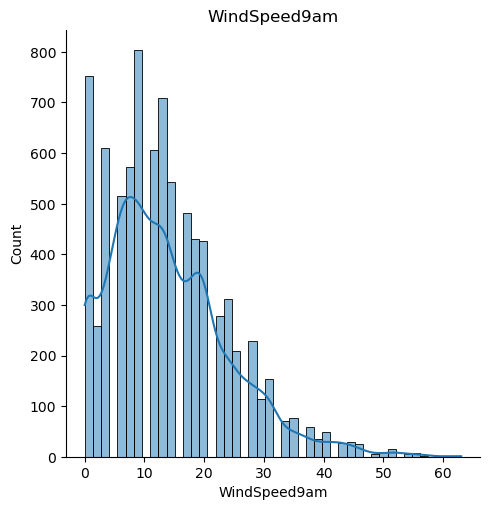

<Figure size 1000x700 with 0 Axes>

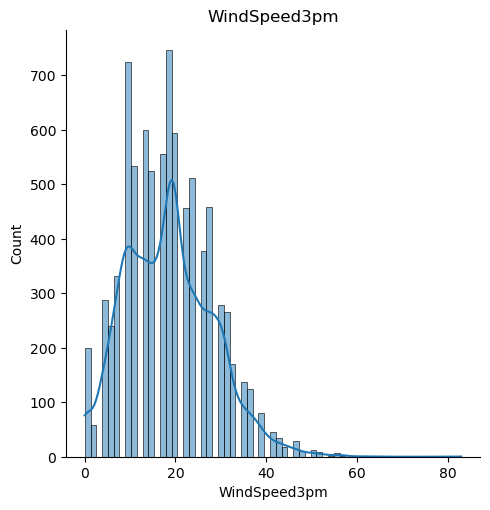

<Figure size 1000x700 with 0 Axes>

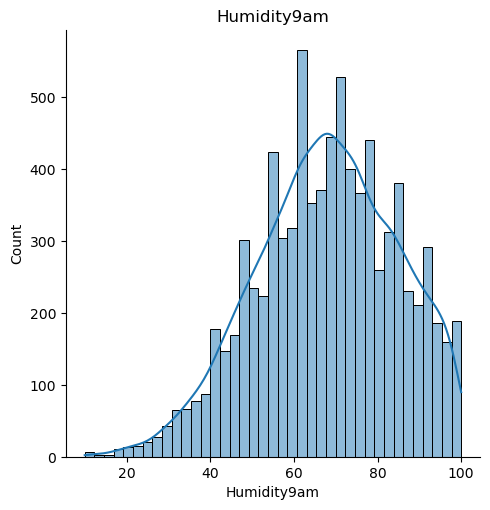

<Figure size 1000x700 with 0 Axes>

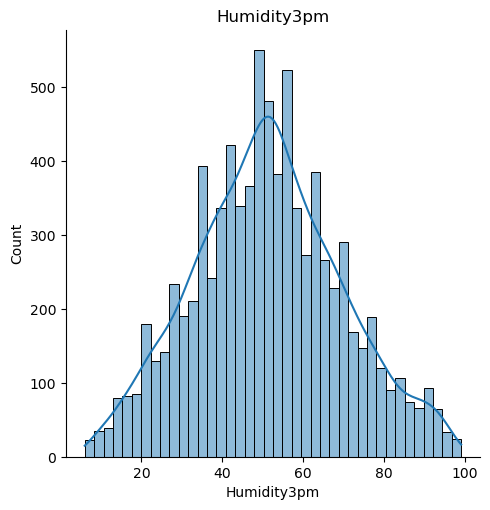

<Figure size 1000x700 with 0 Axes>

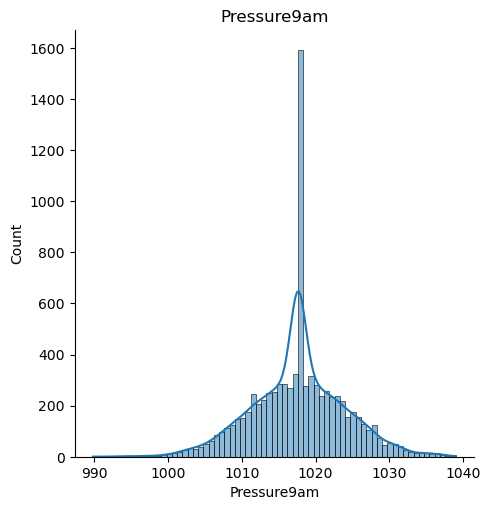

<Figure size 1000x700 with 0 Axes>

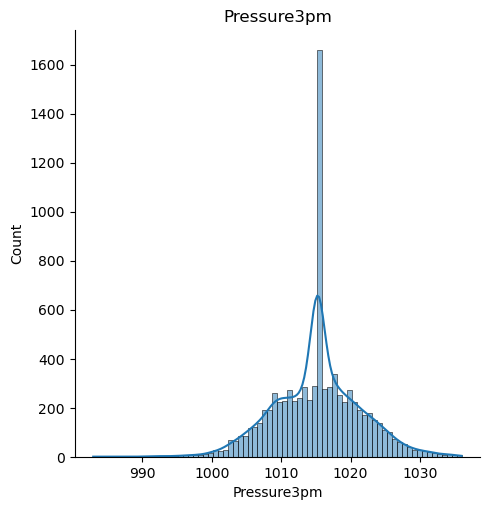

<Figure size 1000x700 with 0 Axes>

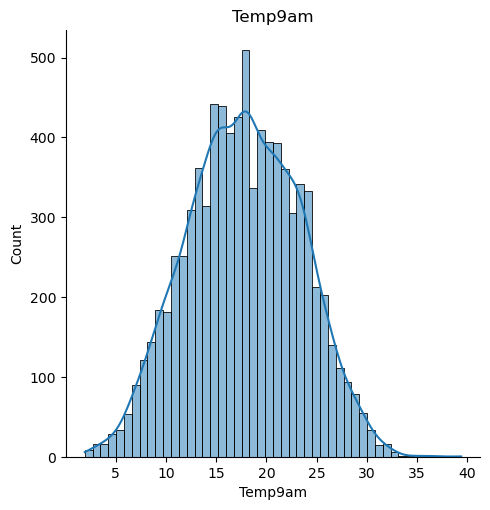

<Figure size 1000x700 with 0 Axes>

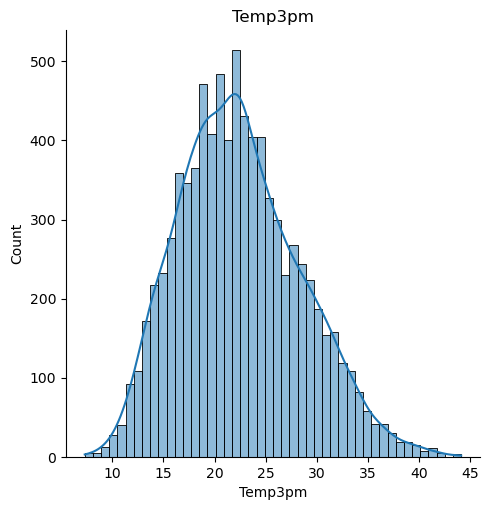

<Figure size 1000x700 with 0 Axes>

In [36]:
for features in continous_features:
    data = df.copy()
    sns.displot(df[features], kde = True)
    plt.xlabel(features)
    plt.ylabel('Count')
    plt.title(features)
    plt.figure(figsize = (10,7))
    plt.show()

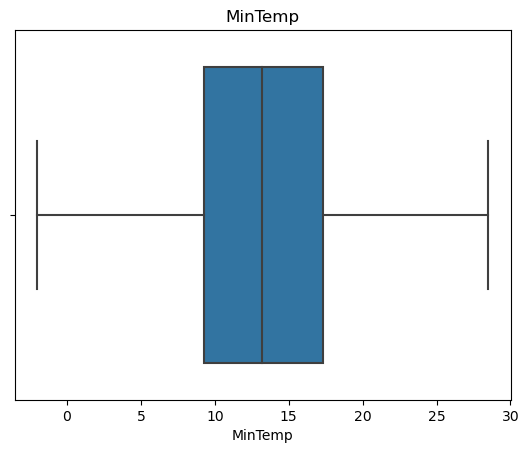

<Figure size 1000x500 with 0 Axes>

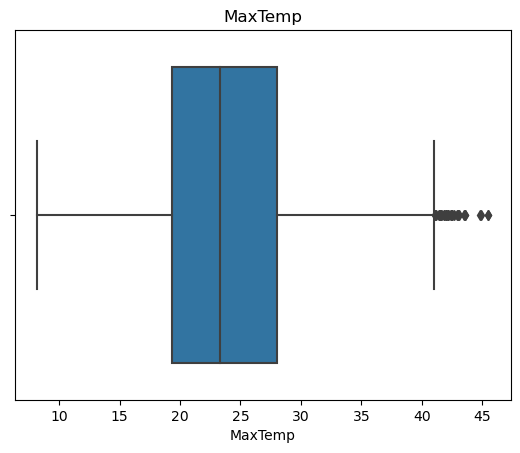

<Figure size 1000x500 with 0 Axes>

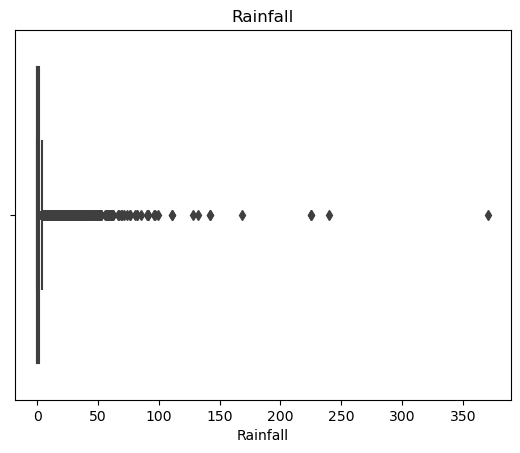

<Figure size 1000x500 with 0 Axes>

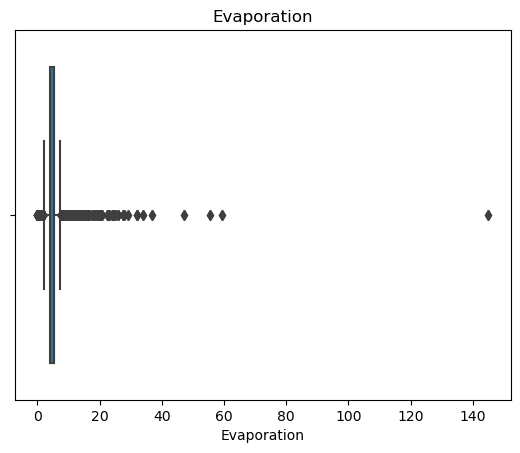

<Figure size 1000x500 with 0 Axes>

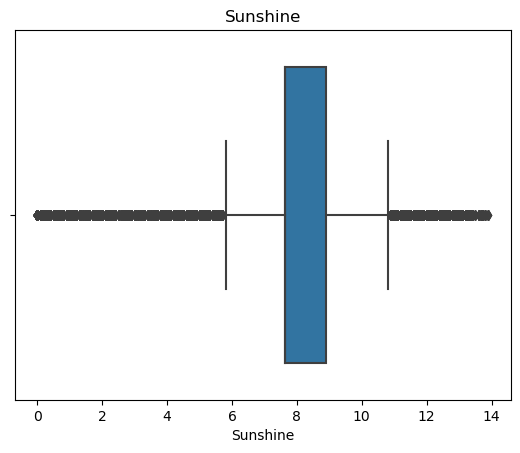

<Figure size 1000x500 with 0 Axes>

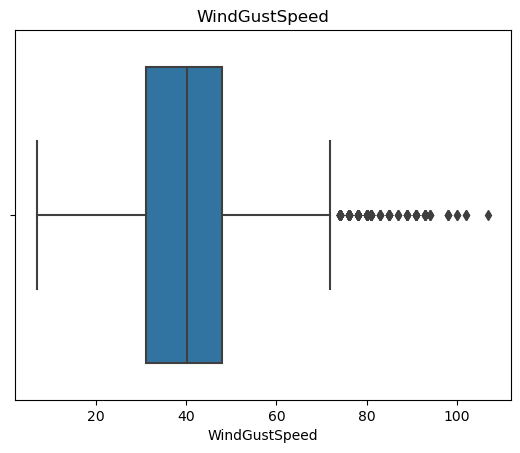

<Figure size 1000x500 with 0 Axes>

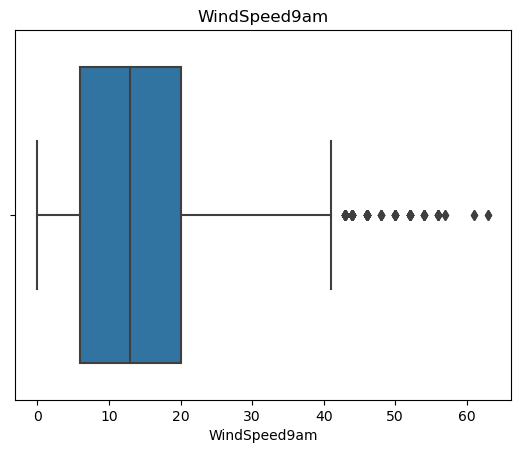

<Figure size 1000x500 with 0 Axes>

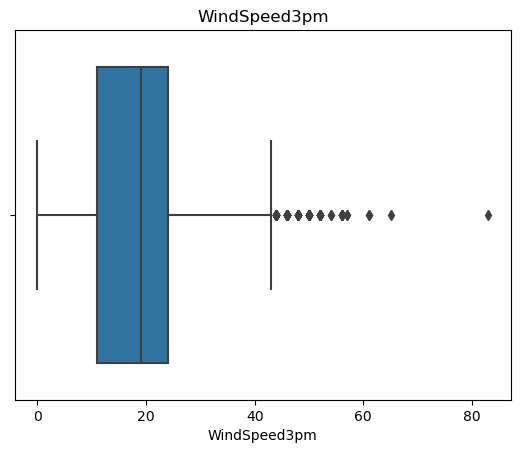

<Figure size 1000x500 with 0 Axes>

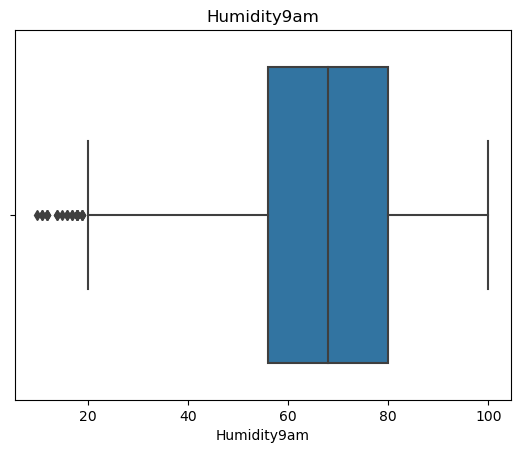

<Figure size 1000x500 with 0 Axes>

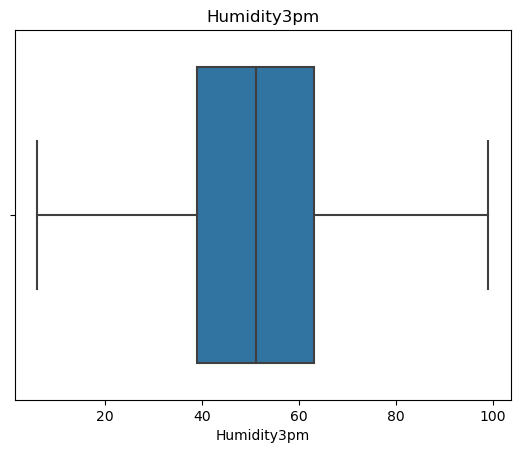

<Figure size 1000x500 with 0 Axes>

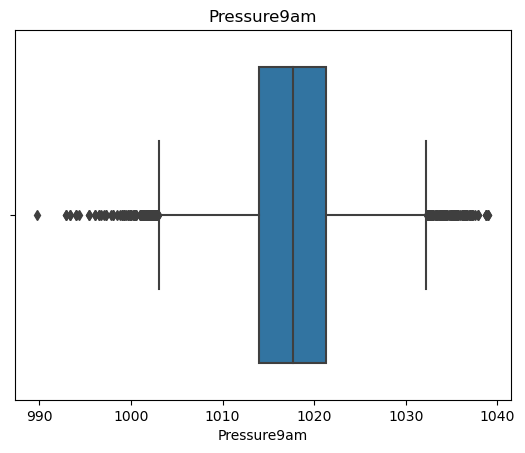

<Figure size 1000x500 with 0 Axes>

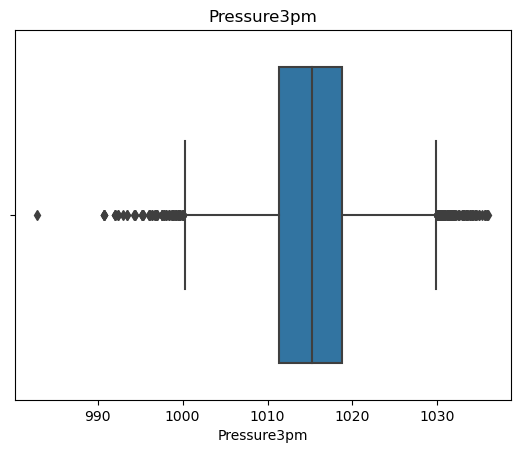

<Figure size 1000x500 with 0 Axes>

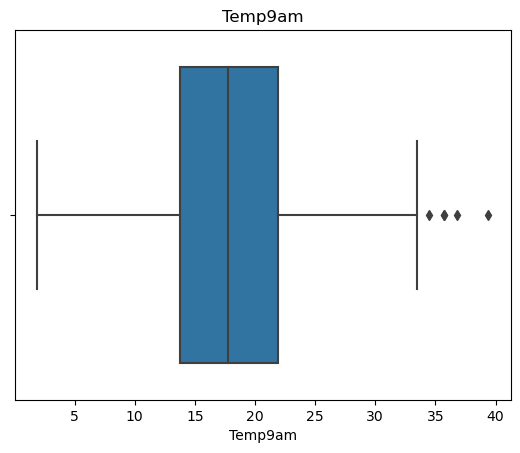

<Figure size 1000x500 with 0 Axes>

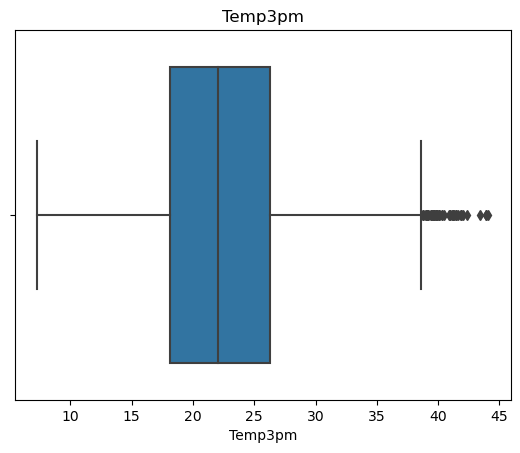

<Figure size 1000x500 with 0 Axes>

In [37]:
# for loop is used to plot a boxplot for all the continous features to see the outliers :

for features in continous_features:
    data = df.copy()
    sns.boxplot(df[features])
    plt.title(features)
    plt.figure(figsize = (10,5))
    plt.show()

In [38]:
# Data Analysis ....

import scipy.stats as stats

MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Temp9am
Temp3pm


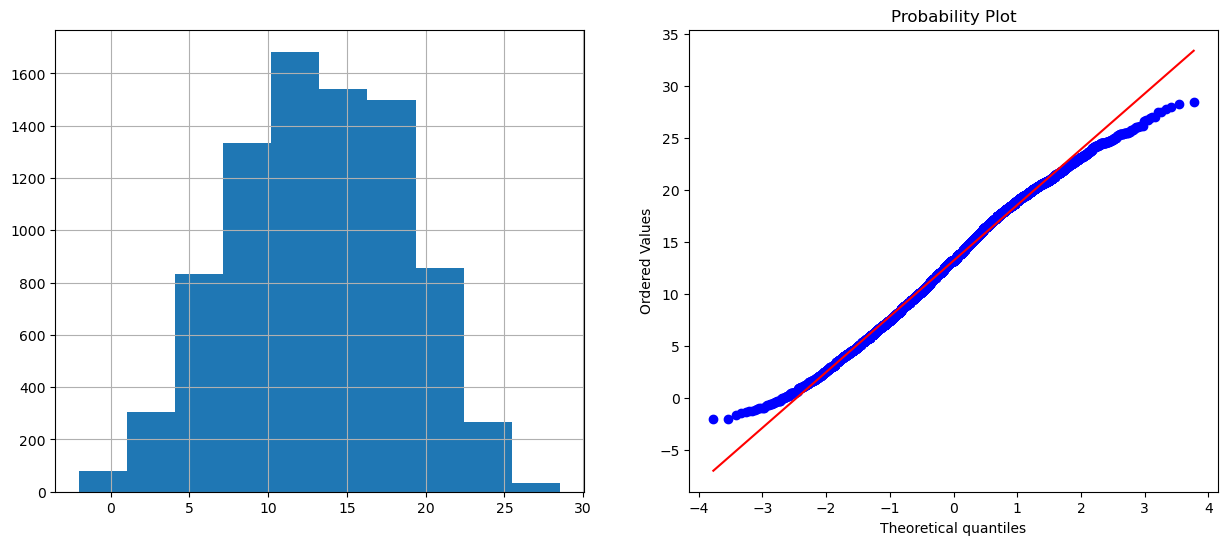

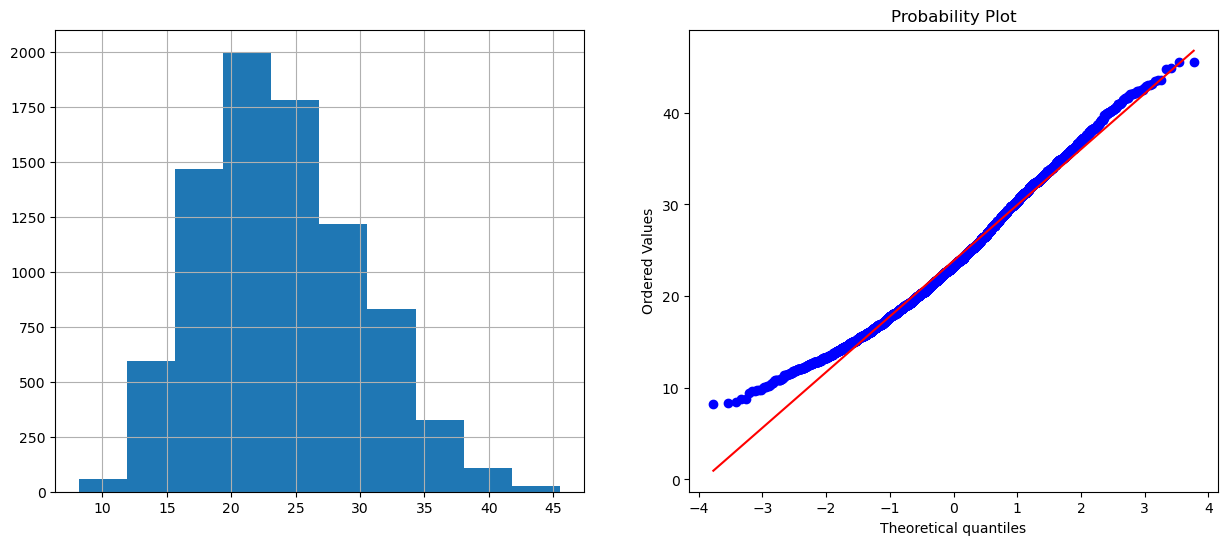

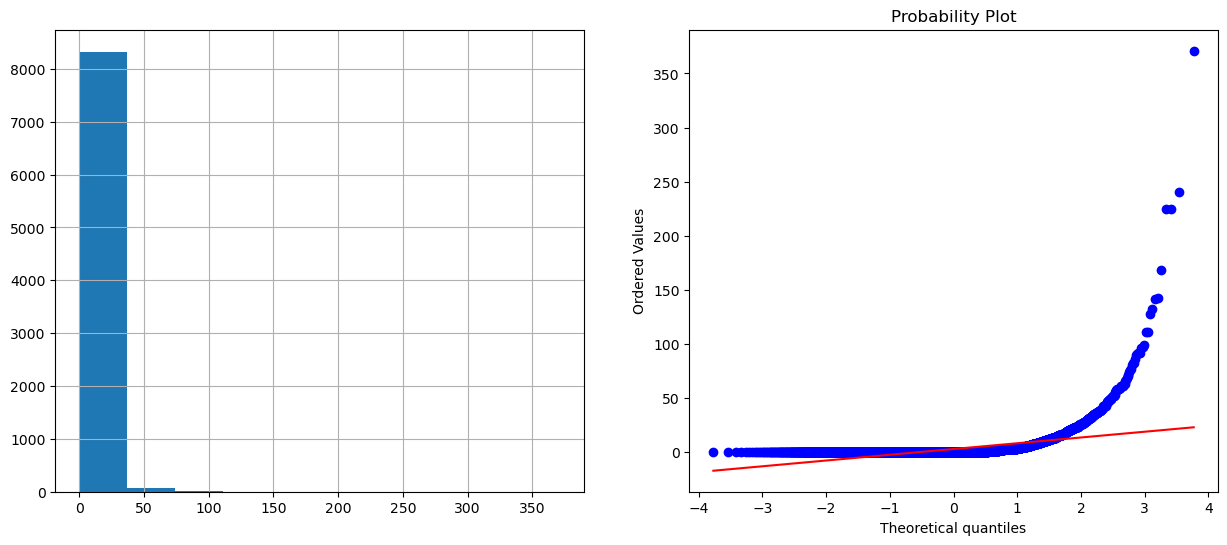

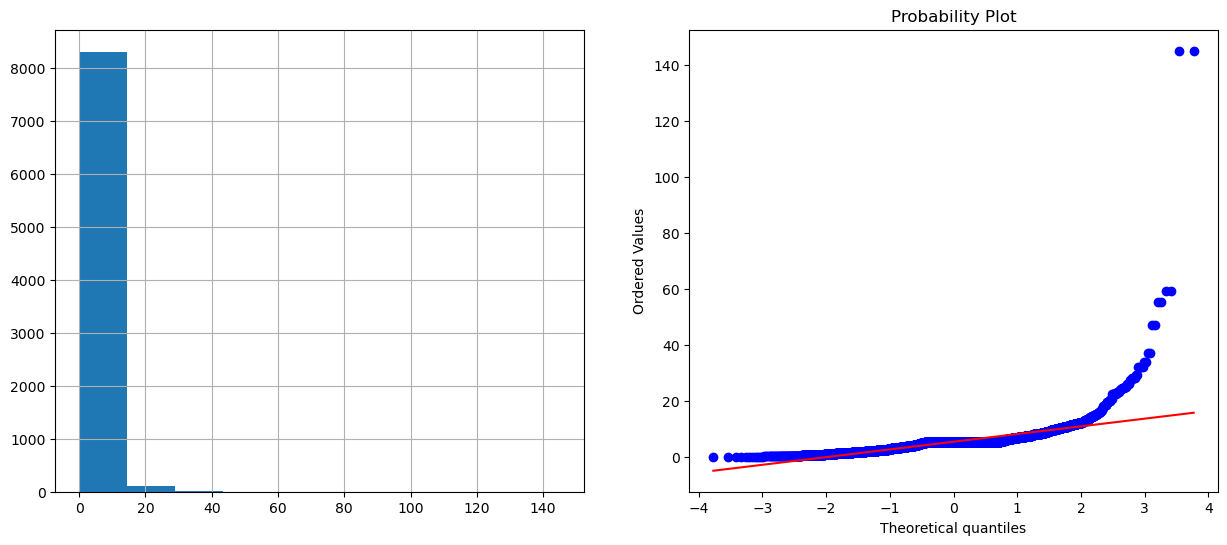

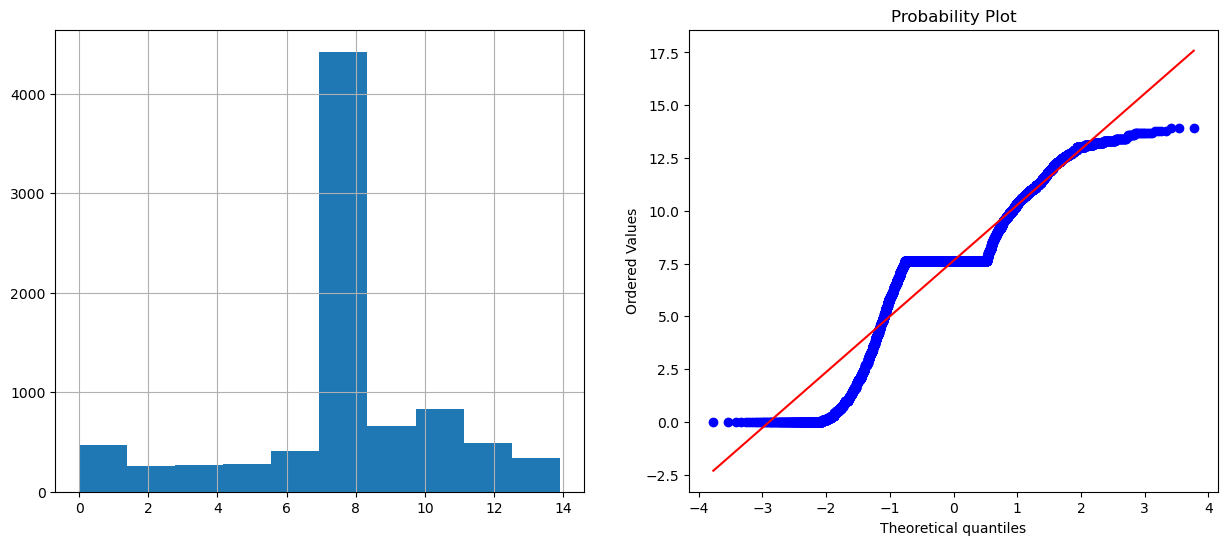

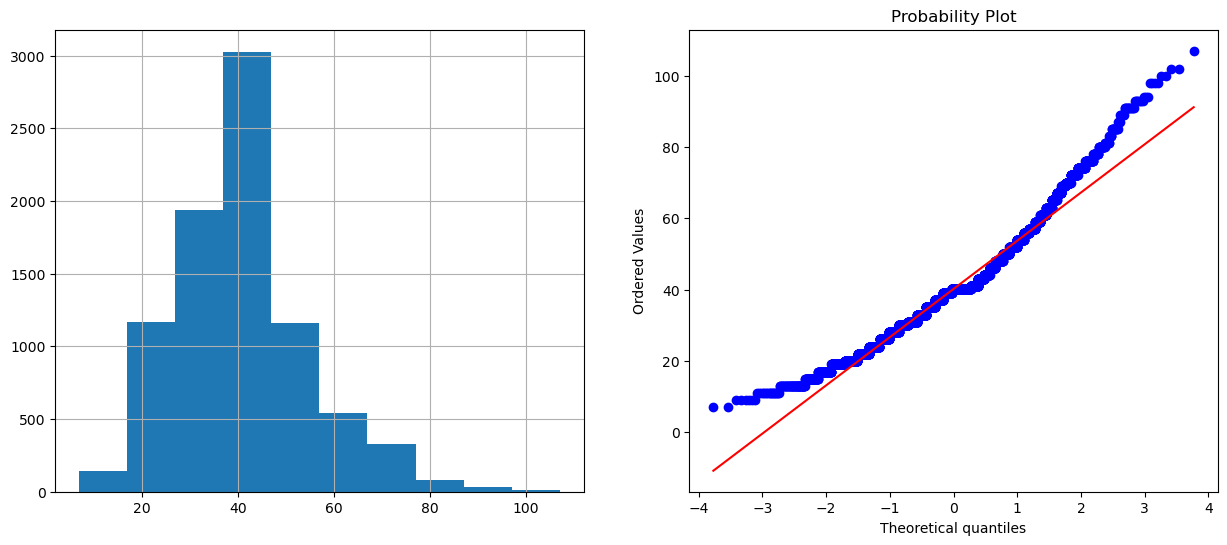

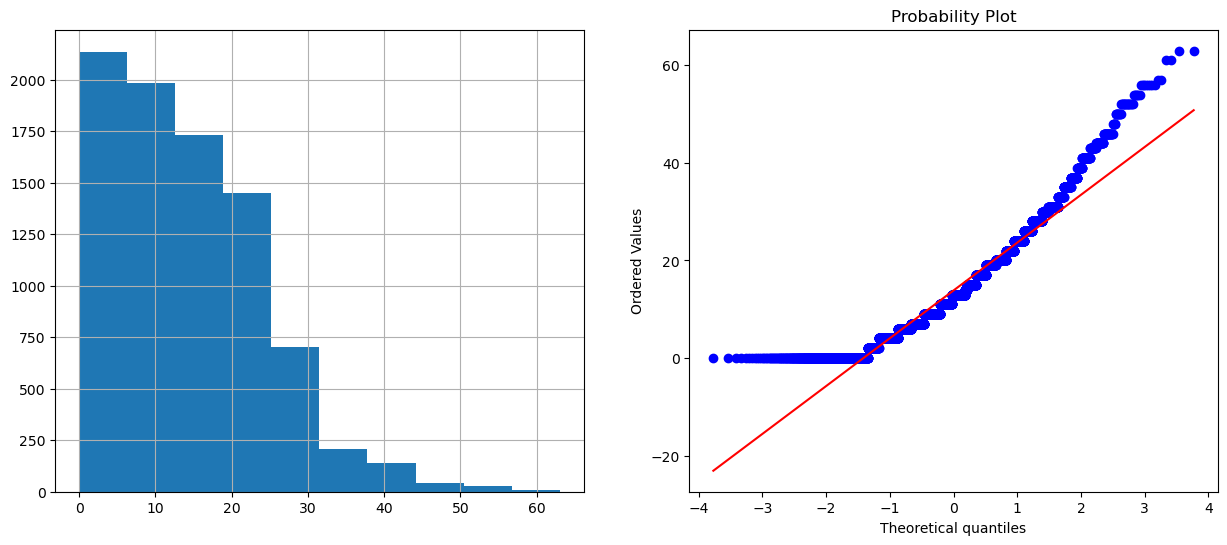

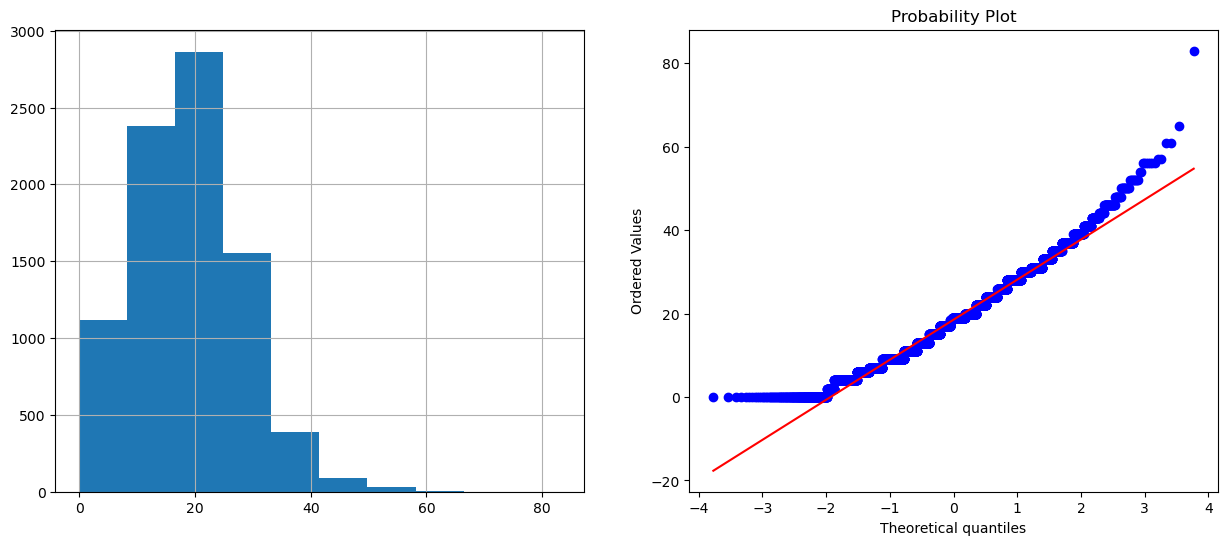

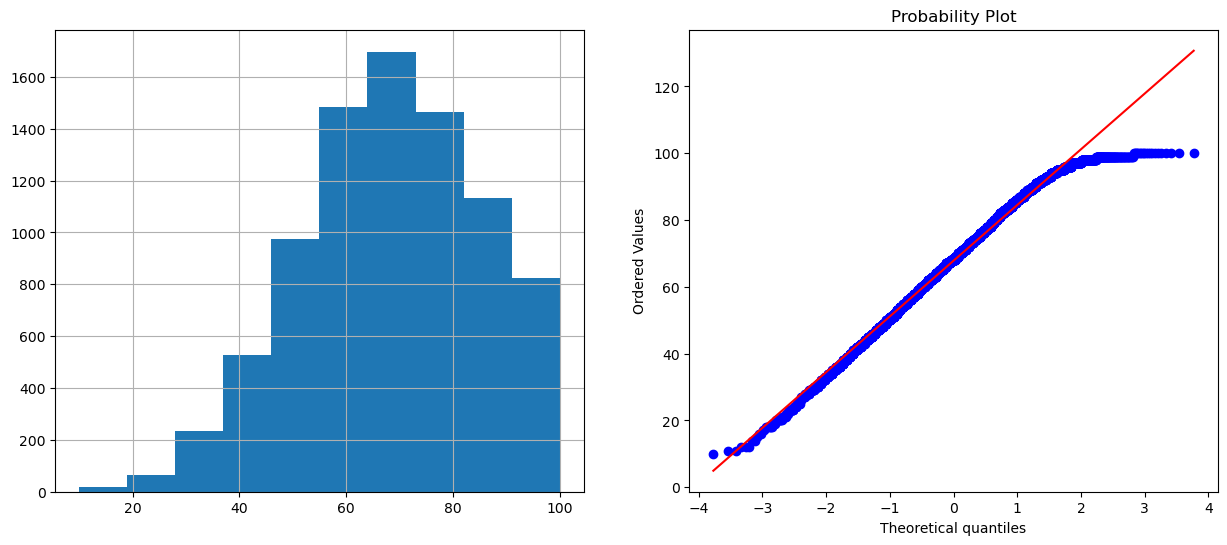

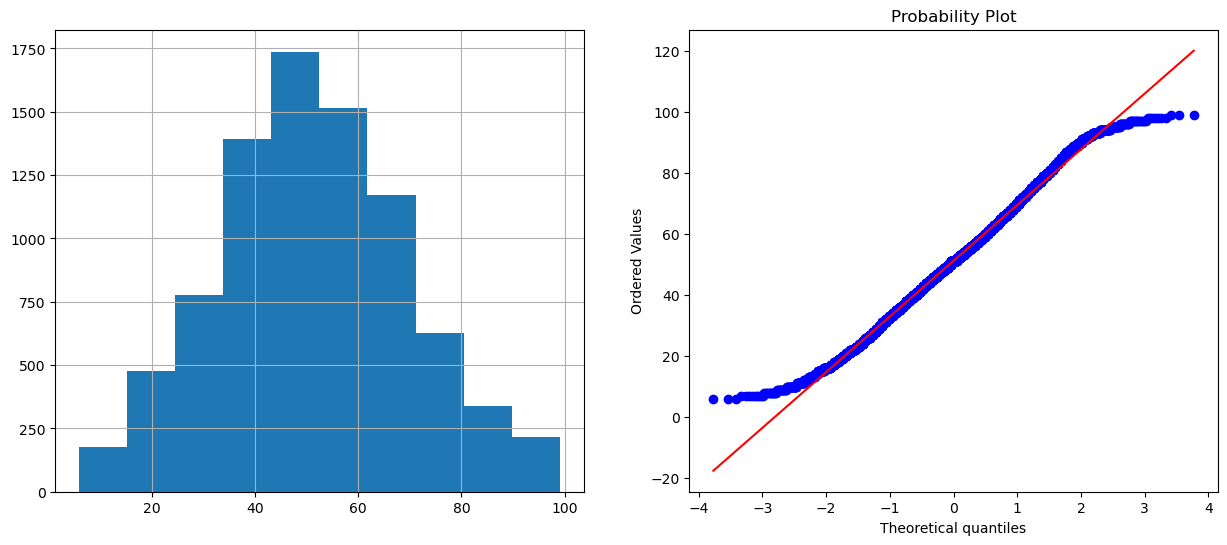

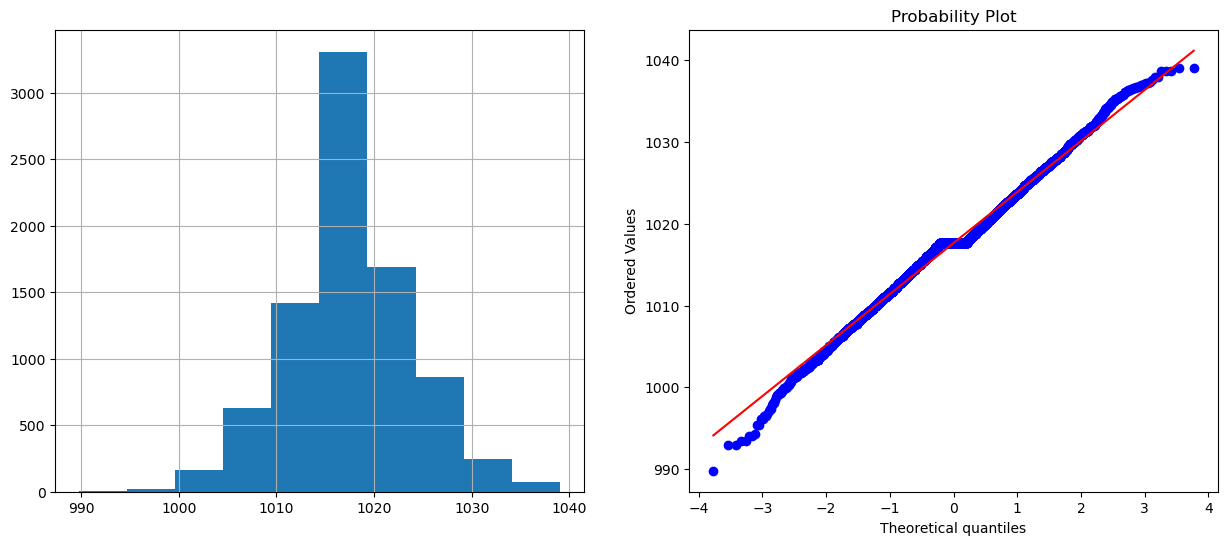

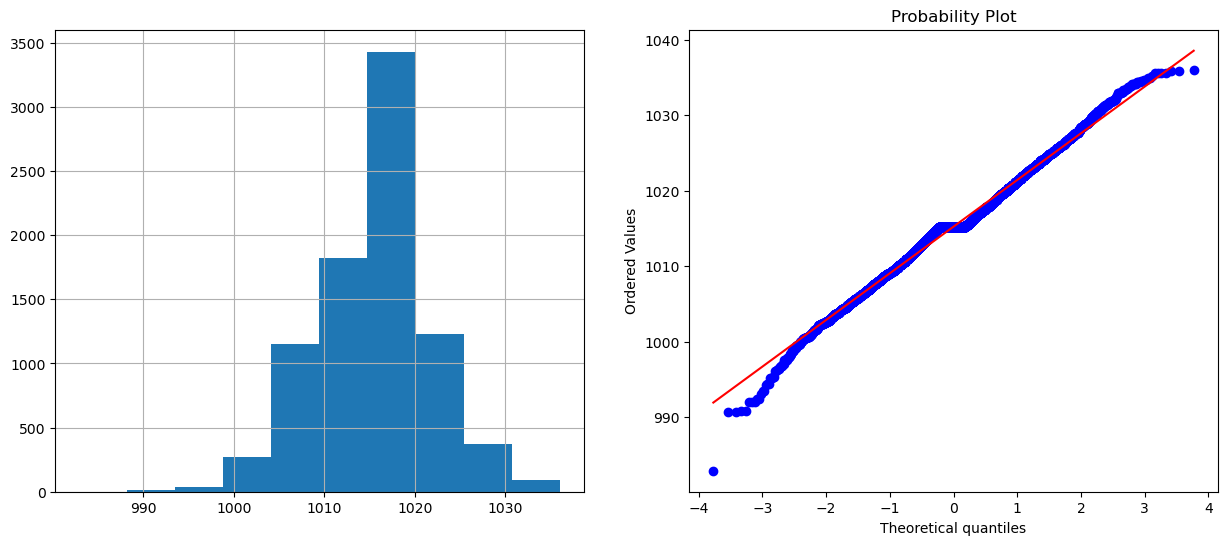

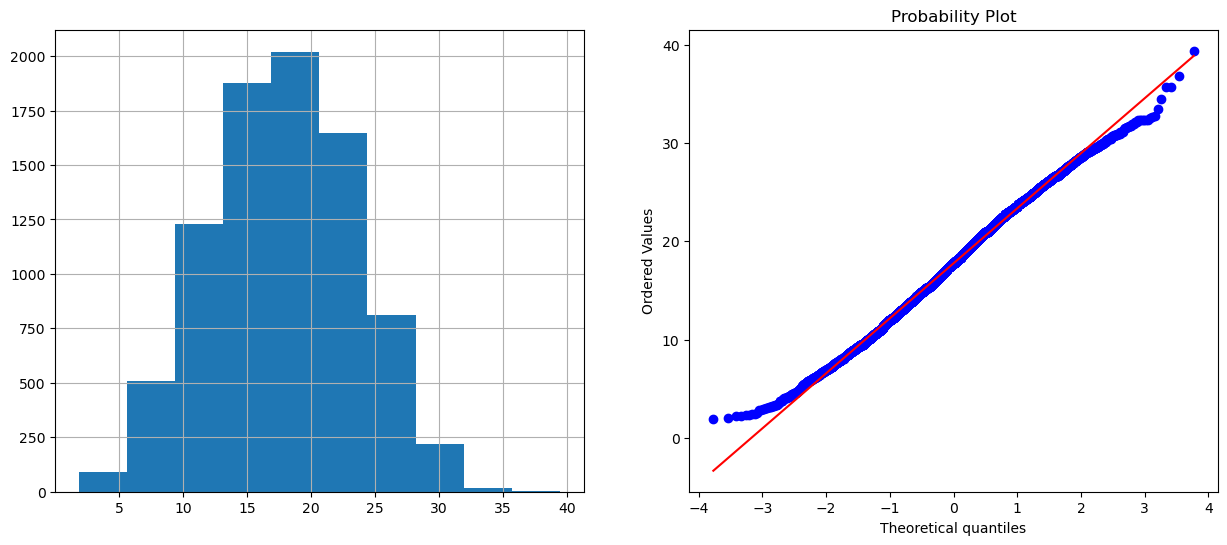

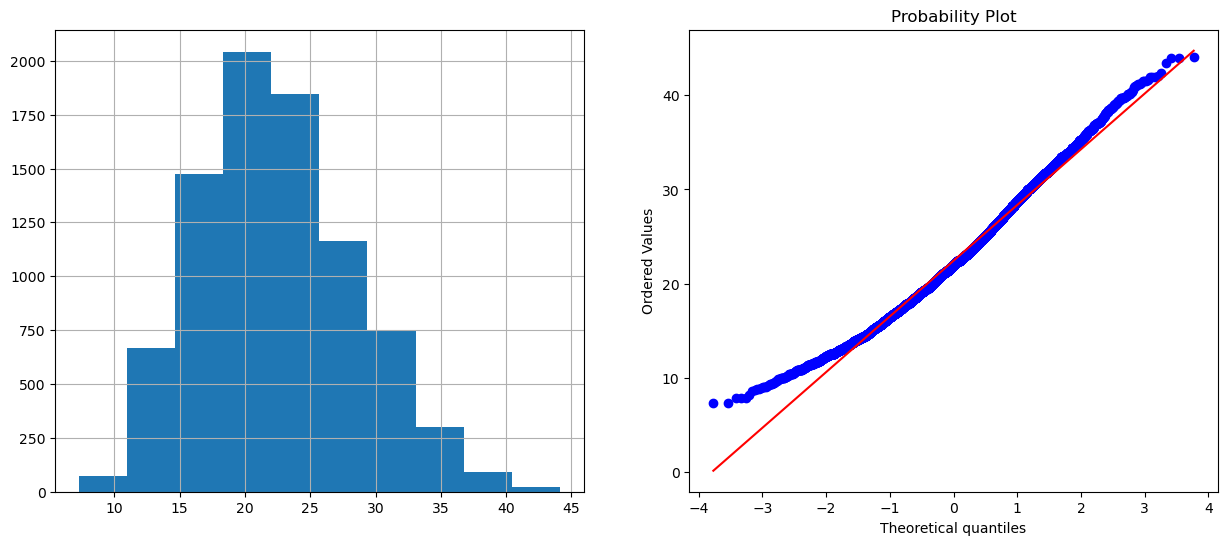

In [39]:
for features in continous_features:
    print(features)
    plt.figure(figsize = (15,6))
    plt.subplot(1,2,1)
    df[features].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[features], dist = 'norm', plot = plt)
    plt.show

In [40]:
categorical_features

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [41]:
# using the label Emcoder method for converting the categorical to numeric value ...

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['Date'] = LE.fit_transform(df['Date'])
df['Location'] = LE.fit_transform(df['Location'])
df['WindGustDir'] = LE.fit_transform(df['WindGustDir'])
df['WindDir9am'] = LE.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = LE.fit_transform(df['WindDir3pm'])
df['RainToday'] = LE.fit_transform(df['RainToday'])
df['RainTomorrow'] = LE.fit_transform(df['RainTomorrow'])

In [42]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,1,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,2,1,12.9,25.7,0.0,5.389395,7.632205,15,46.0,13,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,3,1,9.2,28.0,0.0,5.389395,7.632205,4,24.0,9,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,4,1,17.5,32.3,1.0,5.389395,7.632205,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0


In [43]:
# Correlation:

df.corr()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,1.000000,0.475037,0.016931,0.102409,0.004945,0.153853,0.065101,-0.084552,-0.037361,-0.012369,...,0.086328,-0.038345,0.030809,0.013545,0.005237,-0.010572,0.070703,0.113734,-0.011365,-0.011228
Location,0.475037,1.000000,0.116531,0.064268,0.007693,0.143519,0.057817,-0.035408,0.231396,-0.027103,...,0.005662,0.055790,-0.032261,-0.020574,0.038019,0.017561,0.118051,0.060570,0.003071,0.002824
MinTemp,0.016931,0.116531,1.000000,0.717522,0.087684,0.254965,0.056184,-0.145316,0.230058,-0.041650,...,-0.130731,0.079048,-0.429432,-0.422991,0.091604,0.038414,0.887119,0.685520,0.064789,0.092942
MaxTemp,0.102409,0.064268,0.717522,1.000000,-0.087451,0.322405,0.378403,-0.224670,0.139998,-0.214119,...,-0.390976,-0.421879,-0.325721,-0.403258,-0.253968,-0.250132,0.866039,0.974506,-0.224883,-0.152886
Rainfall,0.004945,0.007693,0.087684,-0.087451,1.000000,0.023517,-0.169432,0.038812,0.086000,0.093821,...,0.228800,0.235444,-0.072668,-0.033649,0.185444,0.150760,-0.007083,-0.090687,0.461106,0.220021
Evaporation,0.153853,0.143519,0.254965,0.322405,0.023517,1.000000,0.226001,-0.078765,0.136371,-0.061677,...,-0.213108,-0.161661,-0.177786,-0.189558,-0.062283,-0.108022,0.305264,0.315109,-0.088654,-0.059012
Sunshine,0.065101,0.057817,0.056184,0.378403,-0.169432,0.226001,1.000000,-0.105918,-0.013778,-0.076560,...,-0.360831,-0.440268,0.021887,-0.035863,-0.533391,-0.547304,0.250640,0.395324,-0.234230,-0.327731
WindGustDir,-0.084552,-0.035408,-0.145316,-0.224670,0.038812,-0.078765,-0.105918,1.000000,0.016591,0.403562,...,0.036467,0.053567,-0.109704,-0.024997,0.123883,0.092979,-0.176318,-0.238856,0.125188,0.051832
WindGustSpeed,-0.037361,0.231396,0.230058,0.139998,0.086000,0.136371,-0.013778,0.016591,1.000000,-0.072058,...,-0.269593,-0.091860,-0.407139,-0.372651,0.023313,0.078631,0.202298,0.102199,0.076822,0.190127
WindDir9am,-0.012369,-0.027103,-0.041650,-0.214119,0.093821,-0.061677,-0.076560,0.403562,-0.072058,1.000000,...,0.025604,0.124556,-0.011024,0.073446,0.099582,0.062947,-0.103111,-0.221634,0.157324,0.032860


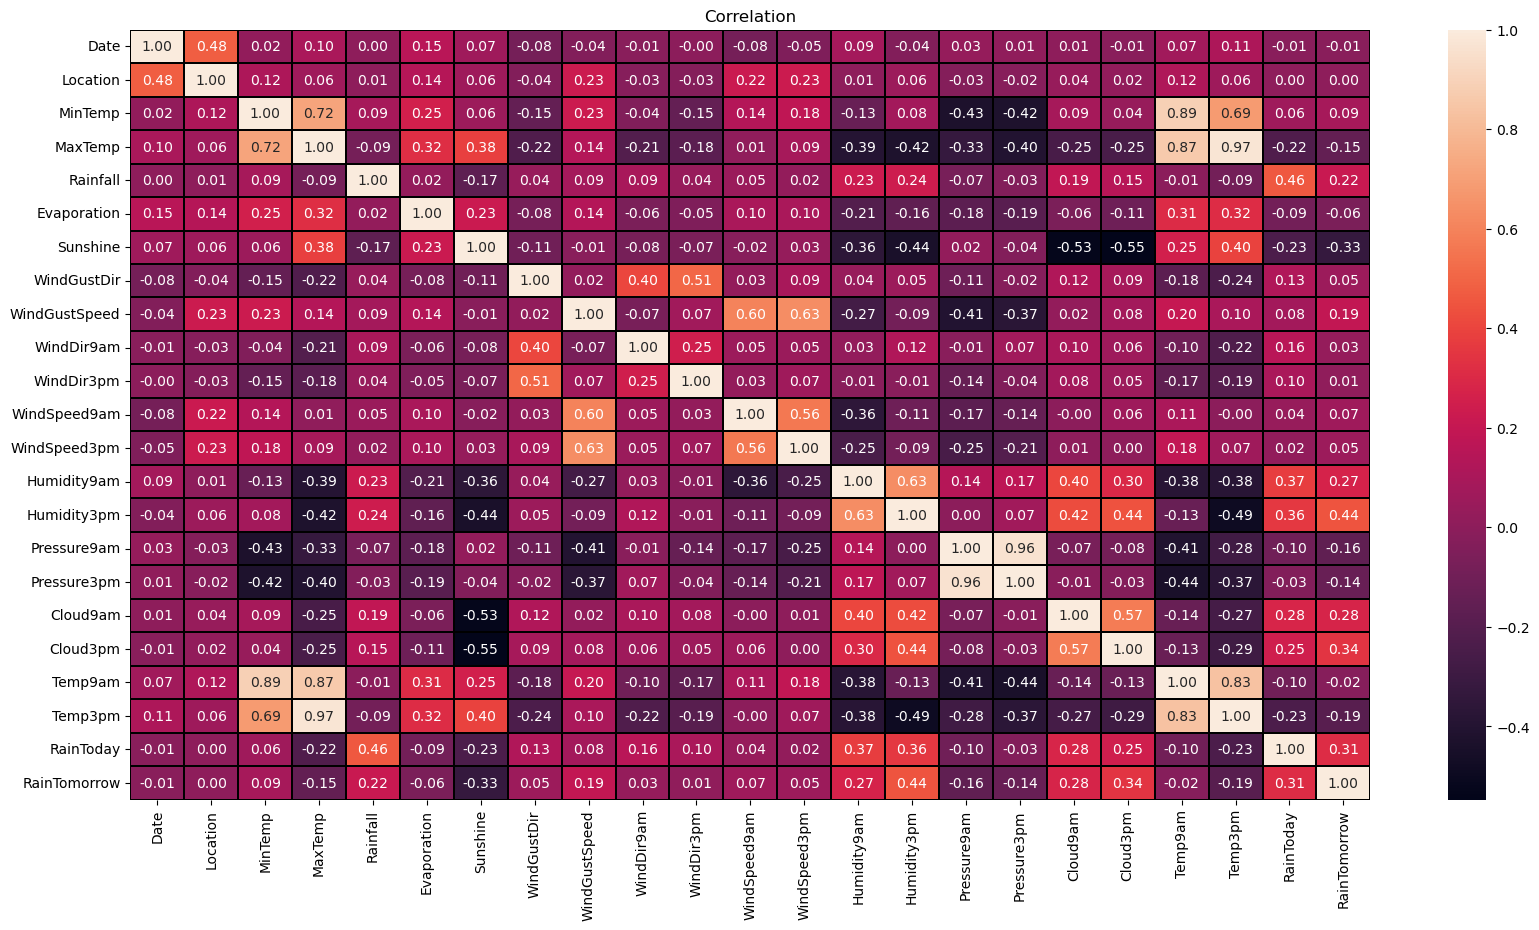

In [44]:
# checking heatmap :

plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True, linewidth = 0.2, linecolor = 'black', fmt = '0.2f')
plt.title('Correlation')
plt.show()

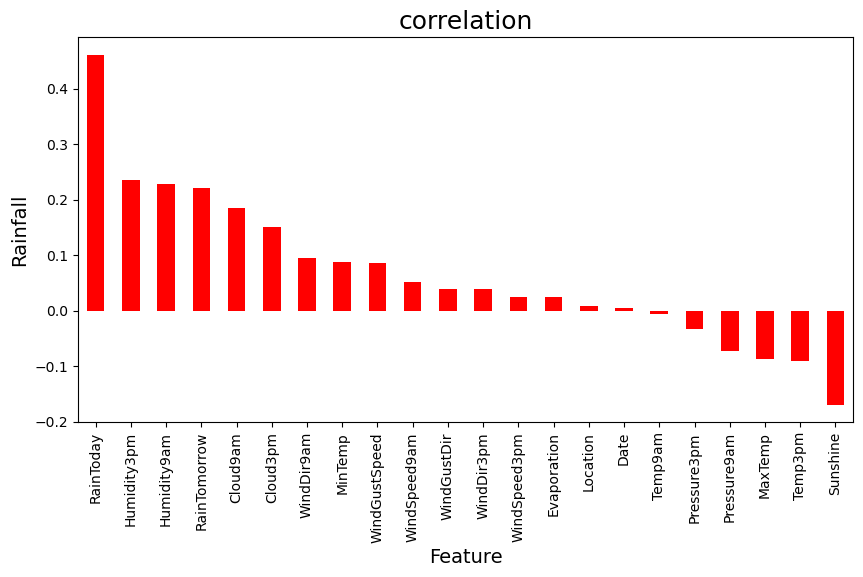

In [45]:
# checking the columns which are positively and negative correlated with the target columns:

plt.figure(figsize = (10,5))
df.corr()['Rainfall'].sort_values(ascending = False).drop(['Rainfall']).plot(kind = 'bar', color = 'r')
plt.xlabel('Feature', fontsize = 14)
plt.ylabel('Rainfall', fontsize = 14)
plt.title('correlation', fontsize = 18)
plt.show()

In [46]:
#Statistical describing ..

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Date,8425.0,1296.570564,854.249434,0.0,589.000000,1088.000000,2021.000000,3003.0
Location,8425.0,5.793591,3.162654,0.0,3.000000,6.000000,8.000000,11.0
MinTemp,8425.0,13.193305,5.379488,-2.0,9.300000,13.200000,17.300000,28.5
MaxTemp,8425.0,23.859976,6.114516,8.2,19.300000,23.300000,28.000000,45.5
Rainfall,8425.0,2.805913,10.309308,0.0,0.000000,0.000000,1.400000,371.0
Evaporation,8425.0,5.389395,3.852004,0.0,4.000000,5.389395,5.389395,145.0
Sunshine,8425.0,7.632205,2.825451,0.0,7.632205,7.632205,8.900000,13.9
WindGustDir,8425.0,7.217804,4.702616,0.0,3.000000,7.000000,12.000000,15.0
WindGustSpeed,8425.0,40.174469,13.776101,7.0,31.000000,40.174469,48.000000,107.0
WindDir9am,8425.0,7.267418,4.588045,0.0,3.000000,7.000000,12.000000,15.0


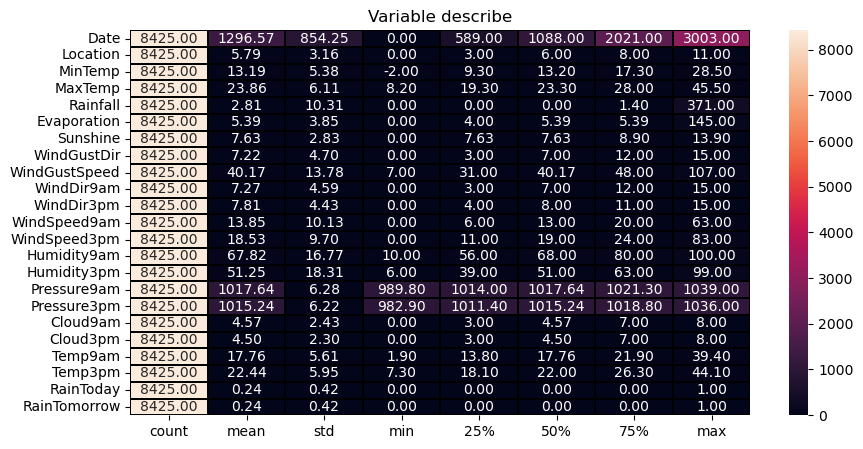

In [47]:
# using heatmap ...

import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.heatmap(df.describe().T, annot = True, linewidth = 0.2, linecolor = 'black', fmt = '0.2f')
plt.title('Variable describe')
plt.show()

In [48]:
# Removing the outlier using the zscore method :

from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
threshold = 3
np.where(z>3)

(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
          62,   62,   67,   68,   68,  123,  267,  296,  381,  381,  405,
         406,  407,  407,  431,  462,  563,  568,  568,  569,  602,  683,
         683,  699,  713,  748,  748,  770,  796,  797,  802,  928,  935,
         949,  979,  980,  980,  980, 1008, 1009, 1011, 1138, 1148, 1149,
        1151, 1189, 1202, 1203, 1237, 1241, 1264, 1265, 1357, 1411, 1412,
        1413, 1479, 1480, 1481, 1513, 1535, 1587, 1644, 1661, 1665, 1673,
        1680, 1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028, 2043, 2063,
        2074, 2108, 2116, 2186, 2201, 2219, 2219, 2230, 2231, 2265, 2429,
        2488, 2500, 2505, 2527, 2527, 2541, 2593, 2676, 2677, 2735, 2827,
        2835, 2849, 2849, 2855, 2859, 2863, 2869, 2877, 2883, 2890, 2891,
        2897, 2898, 2900, 2901, 2905, 2909, 2911, 2919, 2925, 2933, 2939,
        2947, 2953, 2961, 2967, 2975, 2989, 3003, 3051, 3051, 3058, 3059,
        3059, 3060, 3066, 3067, 3067, 

In [49]:
df_new_z = df[(z<3).all(axis=1)]
df_new_z

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,1,13.4,22.900000,0.6,5.389395,7.632205,13,44.000000,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,1,1,7.4,25.100000,0.0,5.389395,7.632205,14,44.000000,6,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,2,1,12.9,25.700000,0.0,5.389395,7.632205,15,46.000000,13,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,3,1,9.2,28.000000,0.0,5.389395,7.632205,4,24.000000,9,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,4,1,17.5,32.300000,1.0,5.389395,7.632205,13,41.000000,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2999,9,2.8,23.400000,0.0,5.389395,7.632205,0,31.000000,9,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0,0
8421,3000,9,3.6,25.300000,0.0,5.389395,7.632205,6,22.000000,9,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0,0
8422,3001,9,5.4,26.900000,0.0,5.389395,7.632205,3,37.000000,9,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0,0
8423,3002,9,7.8,27.000000,0.0,5.389395,7.632205,9,28.000000,10,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0


In [50]:
df.shape

(8425, 23)

In [51]:
df_new_z.shape

(7987, 23)

In [52]:
# Percentage loss of Data :

Data_loss = ((8425-7987)/8425)*100
Data_loss

5.198813056379822

In [53]:
# Checking skewness..

df.skew()

Date              0.386560
Location         -0.050456
MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
Evaporation      14.023948
Sunshine         -0.716525
WindGustDir       0.119640
WindGustSpeed     0.757000
WindDir9am        0.172792
WindDir3pm       -0.119847
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
RainToday         1.242362
RainTomorrow      1.241588
dtype: float64

In [54]:
# Preprocessing ...
# spliting the independent variable and dependent variable before removing the skewness..

x = df.drop('RainTomorrow', axis = 1)
y = df['RainTomorrow']

In [55]:
x

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,0,1,13.4,22.900000,0.6,5.389395,7.632205,13,44.000000,13,...,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0
1,1,1,7.4,25.100000,0.0,5.389395,7.632205,14,44.000000,6,...,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0
2,2,1,12.9,25.700000,0.0,5.389395,7.632205,15,46.000000,13,...,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0
3,3,1,9.2,28.000000,0.0,5.389395,7.632205,4,24.000000,9,...,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0
4,4,1,17.5,32.300000,1.0,5.389395,7.632205,13,41.000000,1,...,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2999,9,2.8,23.400000,0.0,5.389395,7.632205,0,31.000000,9,...,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0
8421,3000,9,3.6,25.300000,0.0,5.389395,7.632205,6,22.000000,9,...,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0
8422,3001,9,5.4,26.900000,0.0,5.389395,7.632205,3,37.000000,9,...,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0
8423,3002,9,7.8,27.000000,0.0,5.389395,7.632205,9,28.000000,10,...,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0


In [56]:
y

0       0
1       0
2       0
3       0
4       0
       ..
8420    0
8421    0
8422    0
8423    0
8424    0
Name: RainTomorrow, Length: 8425, dtype: int32

In [57]:
len(x)

8425

In [58]:
len(y)

8425

In [59]:
x.skew().sort_values()

Sunshine         -0.716525
Cloud9am         -0.366503
Cloud3pm         -0.276294
Humidity9am      -0.256743
WindDir3pm       -0.119847
MinTemp          -0.089989
Location         -0.050456
Pressure9am      -0.024082
Temp9am          -0.014748
Pressure3pm      -0.010214
Humidity3pm       0.118281
WindGustDir       0.119640
WindDir9am        0.172792
MaxTemp           0.380654
Date              0.386560
Temp3pm           0.397331
WindSpeed3pm      0.494217
WindGustSpeed     0.757000
WindSpeed9am      0.960591
RainToday         1.242362
Rainfall         13.218403
Evaporation      14.023948
dtype: float64

In [60]:
# We can see skewness is most of the columns in dataset, we will remove skewness using power_transform function :

from sklearn.preprocessing import power_transform, PowerTransformer

pt = PowerTransformer()
x_new_pt = pt.fit_transform(x)
x_new_pt

array([[-2.4632376 , -1.57286976,  0.04112367, ..., -0.14656616,
        -0.02721805, -0.55609919],
       [-2.43474226, -1.57286976, -1.07628109, ..., -0.09309457,
         0.38526239, -0.55609919],
       [-2.41266121, -1.57286976, -0.05171292, ...,  0.58102231,
         0.20714517, -0.55609919],
       ...,
       [ 1.65327865,  1.00253169, -1.45084117, ..., -0.93582248,
         0.66632192, -0.55609919],
       [ 1.65400073,  1.00253169, -1.00152086, ..., -0.46825982,
         0.65102678, -0.55609919],
       [ 1.65472269,  1.00253169,  0.31938327, ..., -0.48617712,
        -0.18278818, -0.55609919]])

In [61]:
# numpy array :

x_new = power_transform(x)
x_new

array([[-2.4632376 , -1.57286976,  0.04112367, ..., -0.14656616,
        -0.02721805, -0.55609919],
       [-2.43474226, -1.57286976, -1.07628109, ..., -0.09309457,
         0.38526239, -0.55609919],
       [-2.41266121, -1.57286976, -0.05171292, ...,  0.58102231,
         0.20714517, -0.55609919],
       ...,
       [ 1.65327865,  1.00253169, -1.45084117, ..., -0.93582248,
         0.66632192, -0.55609919],
       [ 1.65400073,  1.00253169, -1.00152086, ..., -0.46825982,
         0.65102678, -0.55609919],
       [ 1.65472269,  1.00253169,  0.31938327, ..., -0.48617712,
        -0.18278818, -0.55609919]])

In [62]:
# transform II(x)
# transform III(X)

# checking skewness :

pd.DataFrame(x_new, columns = x.columns).skew().sort_values(ascending = False)

RainToday        1.242362
Rainfall         0.904387
Evaporation      0.080305
WindGustSpeed    0.010481
Pressure9am      0.002514
Pressure3pm      0.001772
Temp3pm         -0.009893
MaxTemp         -0.010591
WindSpeed3pm    -0.037553
Humidity3pm     -0.038753
Temp9am         -0.048994
Humidity9am     -0.067235
Sunshine        -0.075544
WindSpeed9am    -0.079333
MinTemp         -0.102983
WindDir9am      -0.155025
Date            -0.166431
Location        -0.186657
WindGustDir     -0.187177
Cloud3pm        -0.220610
WindDir3pm      -0.248689
Cloud9am        -0.282006
dtype: float64

In [63]:
y.value_counts()

0    6434
1    1991
Name: RainTomorrow, dtype: int64

In [64]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)

In [65]:
y.value_counts()

0    6434
1    6434
Name: RainTomorrow, dtype: int64

In [75]:
# Model selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score

In [77]:
for i in range (0,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = i, test_size = 0.20)
    
    LR.fit(x_train, y_train)
    pred_train = LR.predict(x_train)
    pred_test = LR.predict(x_test)
    if round (accuracy_score (y_train, pred_train)* 100,1) == round(accuracy_score(y_test, pred_test)* 100,1):
        print("At random state", i, "The model performance very well")
        print("At random_state :-", i)
        print("Training accuracy is :-", accuracy_score(y_train, pred_train)* 100)
        print("Testing accuracy is :-", accuracy_score(y_test, pred_test)* 100)

At random state 69 The model performance very well
At random_state :- 69
Training accuracy is :- 77.18088206722362
Testing accuracy is :- 77.15617715617715
At random state 73 The model performance very well
At random_state :- 73
Training accuracy is :- 77.17116767048766
Testing accuracy is :- 77.23387723387724
At random state 91 The model performance very well
At random_state :- 91
Training accuracy is :- 77.01573732271227
Testing accuracy is :- 77.03962703962704


In [78]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 89)

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.51      0.52      0.52      1313
           1       0.49      0.48      0.49      1261

    accuracy                           0.50      2574
   macro avg       0.50      0.50      0.50      2574
weighted avg       0.50      0.50      0.50      2574



In [80]:
# cross validation score for logistic regression :

pred_LR = LR.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred_LR)
for j in range(2,10):
    lsscore = cross_val_score(LR,x,y,cv=j)
    lsc = lsscore.mean()
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100)
    print("accuarcy_score is:-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 71.42524090767796
accuarcy_score is:- 76.06837606837607


At cv:- 3
Cross validation score is:- 70.93571618402582
accuarcy_score is:- 76.06837606837607


At cv:- 4
Cross validation score is:- 70.62480571961454
accuarcy_score is:- 76.06837606837607


At cv:- 5
Cross validation score is:- 71.42614823532041
accuarcy_score is:- 76.06837606837607


At cv:- 6
Cross validation score is:- 70.38524234886175
accuarcy_score is:- 76.06837606837607


At cv:- 7
Cross validation score is:- 73.19766206855337
accuarcy_score is:- 76.06837606837607


At cv:- 8
Cross validation score is:- 73.49328752446593
accuarcy_score is:- 76.06837606837607


At cv:- 9
Cross validation score is:- 73.64921758903564
accuarcy_score is:- 76.06837606837607




In [81]:
# DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
pred_train_dtc = dt.predict(x_train)
print("Testing Accuracy", accuracy_score(y_test, preddt)*100)    #testing accuracy
print("Training Accuracy", accuracy_score(y_train, pred_train_dtc)*100)     # training accuracy
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))
      

Testing Accuracy 87.41258741258741
Training Accuracy 100.0
[[1151  162]
 [ 162 1099]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1313
           1       0.87      0.87      0.87      1261

    accuracy                           0.87      2574
   macro avg       0.87      0.87      0.87      2574
weighted avg       0.87      0.87      0.87      2574



In [82]:
# checking Cross validation score for DecisionTreeClassifier :

score = cross_val_score(dt, x, y)
print(score)
print(score.mean())
print("Diff b/w Accuracy Score and Cross Validation score is :-", accuracy_score(y_test, preddt) - score.mean())

[0.62043512 0.61421911 0.87995338 0.83365721 0.788185  ]
0.7472899644294902
Diff b/w Accuracy Score and Cross Validation score is :- 0.12683590969638392


In [83]:
# RandomForestClassier :

from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.940947940947941
[[1227   86]
 [  66 1195]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1313
           1       0.93      0.95      0.94      1261

    accuracy                           0.94      2574
   macro avg       0.94      0.94      0.94      2574
weighted avg       0.94      0.94      0.94      2574



In [84]:
# checking cross validation score for RandomForestClassifier :

score = cross_val_score(RFC, x, y)
print(score)
print(score.mean())
print("Diff b/w Accuracy Score and Cross validation score is :-", accuracy_score(y_test, predRFC) - score.mean())

[0.6969697  0.64335664 0.88267288 0.87990672 0.85658764]
0.7918987175108435
Diff b/w Accuracy Score and Cross validation score is :- 0.14904922343709748


In [85]:
# Supportvectormachine :

from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.7276612276612276
[[952 361]
 [340 921]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73      1313
           1       0.72      0.73      0.72      1261

    accuracy                           0.73      2574
   macro avg       0.73      0.73      0.73      2574
weighted avg       0.73      0.73      0.73      2574



In [86]:
# checking cross validation score for SupportvectorMachine :

score = cross_val_score(svc, x, y)
print(score)
print(score.mean())
print("Diff b/w Accuracy Score and Cross validation score is :-", accuracy_score(y_test, predsvc) - score.mean())

[0.54156954 0.34965035 0.54118104 0.63000389 0.72755538]
0.5579920403472677
Diff b/w Accuracy Score and Cross validation score is :- 0.16966918731395997


In [87]:
# Gradient Boosting Classifier:

from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.8547008547008547
[[1132  181]
 [ 193 1068]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1313
           1       0.86      0.85      0.85      1261

    accuracy                           0.85      2574
   macro avg       0.85      0.85      0.85      2574
weighted avg       0.85      0.85      0.85      2574



In [88]:
# checking cross validation score for GradientBoostingClassifier :

score = cross_val_score(GB, x, y)
print(score)
print(score.mean())
print("Diff b/w Accuracy Score and Cross validation score is :-", accuracy_score(y_test, predGB) - score.mean())

[0.62043512 0.52641803 0.74475524 0.75592693 0.74154683]
0.6778164315280522
Diff b/w Accuracy Score and Cross validation score is :- 0.1768844231728025


In [89]:
# ExtraTreesClassifier:

from sklearn.ensemble import ExtraTreesClassifier
ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.947940947940948
[[1229   84]
 [  50 1211]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1313
           1       0.94      0.96      0.95      1261

    accuracy                           0.95      2574
   macro avg       0.95      0.95      0.95      2574
weighted avg       0.95      0.95      0.95      2574



In [90]:
# checking cross validation score for ExtraTreesClassifier :

score = cross_val_score(ET, x, y)
print(score)
print(score.mean())
print("Diff b/w Accuracy Score and Cross validation score is :-", accuracy_score(y_test, predET) - score.mean())

[0.66045066 0.71522922 0.88578089 0.87679751 0.81422464]
0.7904965829178809
Diff b/w Accuracy Score and Cross validation score is :- 0.15744436502306702


In [91]:
# Hyper Parameter Tunning :

from sklearn.model_selection import GridSearchCV

In [92]:
parameters = {'criterion': ['gini', 'entropy'],
             'random_state' : [10,50,1000],
             'max_depth' : [0,10,20],
             'n_jobs' : [-2,-1,1],
             'n_estimators' : [50,100,200,300]}

In [93]:
GCV =GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)

In [94]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [95]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 1000}

In [96]:
final_model = ExtraTreesClassifier(criterion = 'gini', max_depth = 20, n_estimators = 100, n_jobs = -2, random_state = 1000)
final_model.fit(x_train,y_train)
pred = final_model.predict(x_train)
acc = accuracy_score(y_train, pred)
print(acc*100)

99.90285603264037


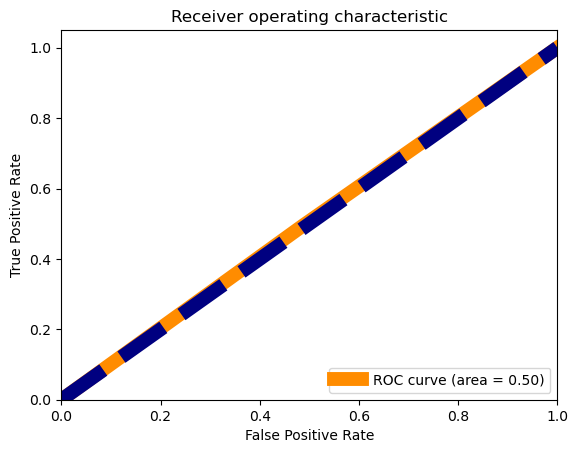

In [97]:
# AUC-RUC Curve :

from sklearn.metrics import roc_curve, auc
fpr,tpr,thresholds = roc_curve(pred_test, y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=10, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color = 'navy', lw=10, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

In [98]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve,auc

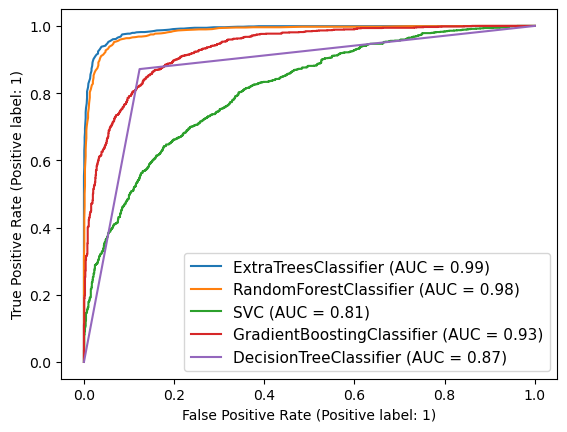

In [99]:
disp = plot_roc_curve(ET, x_test, y_test)  #ax_ = Axes with confusion matrix
plot_roc_curve(RFC, x_test, y_test, ax = disp.ax_)

plot_roc_curve(svc, x_test, y_test, ax = disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax = disp.ax_)
plot_roc_curve(dt, x_test, y_test, ax = disp.ax_)

plt.legend(prop = {'size' :11}, loc = 'lower right')
plt.show()

In [100]:
# Model Saving :

import pickle
filename = 'Rainfall.pkl'
pickle.dump(LR, open(filename, 'wb'))

In [101]:
# Conclusion :

import numpy as np
a = np.array(y_test)
predicted = np.array(LR.predict(x_test))
df_com = pd.DataFrame({"Orignal" : a, "predicted" : predicted}, index = range(len(a)))

In [102]:
df_com

,Orignal,predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
2569,1,1
2570,0,1
2571,0,0
2572,1,1
